# Install dependencies

In [1]:
!pip install tensorflow opencv-python matplotlib --user

  Using cached opencv_python-4.7.0.72-cp37-abi3-win_amd64.whl (38.2 MB)
     -------------------------------------- 272.8/272.8 MB 1.8 MB/s eta 0:00:00
  Using cached flatbuffers-23.3.3-py2.py3-none-any.whl (26 kB)
  Using cached keras-2.12.0-py2.py3-none-any.whl (1.7 MB)
     ---------------------------------------- 4.1/4.1 MB 1.9 MB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached tensorboard-2.12.2-py3-none-any.whl (5.6 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached tensorflow_estimator-2.12.0-py2.py3-none-any.whl (440 kB)
     ---------------------------------------- 1.5/1.5 MB 2.0 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached libclang-16.0.0-py2.py3-none-win_amd64.whl (24.4 MB)
     -------------------------------------- 420.6/420.6 kB 1.9 MB/s eta 0:00:00
  Using cached termcolor-2.3.0-py3-none-any.whl (6.9 kB)
  Using ca

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


# Import dependencies

In [2]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

# Import tensorflow dependencies - Functional API

In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

# Create folder structures

POS_PATH = os.path.join('data', 'positive')
NEG_PATH = os.path.join('data', 'negative')
ANC_PATH = os.path.join('data', 'anchor')

make the directories

os.makedirs(POS_PATH)
os.makedirs(NEG_PATH)
os.makedirs(ANC_PATH)

# Uncompress the dataset

!tar -xf lfw.tgz

### Move all images to data/negative repository

for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

### import uuid library to generate unique image names

In [5]:
import uuid

# Stabilish a connection to the webcam to collect data

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    #Cut down frame to 250x250px
    frame = frame[25:25+250, 200:200+250, :]
    
    #Collect anchors
    if cv2.waitKey(1) & 0XFF == ord('a'):
        #create the unique file path
        imgname = os.path.join(ANC_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write out anchor image
        cv2.imwrite(imgname, frame)
        
    #Collect positives
    if cv2.waitKey(1) & 0XFF == ord('p'):
        #create the unique file path
        imgname = os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        #write out anchor image
        cv2.imwrite(imgname, frame)
        
    #show the current frame
    cv2.imshow('Image Collection', frame)
    
    if cv2.waitKey(1) & 0XFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [8]:
frame.shape

(250, 250, 3)

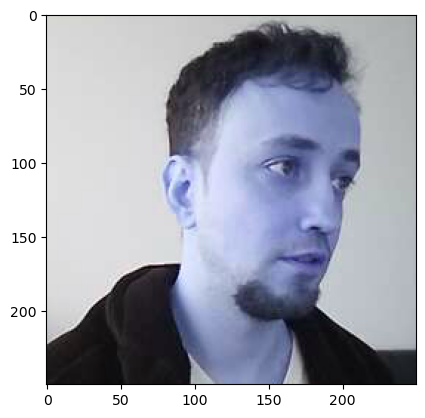

In [10]:
plt.imshow(frame)

# Load and preprocess images

##### get images directories

In [6]:
anchor = tf.data.Dataset.list_files(ANC_PATH+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG_PATH+'\*.jpg').take(300)

#### verify if paths are as expected

In [7]:

ANC_PATH+'\*jpg'

'data\\anchor\\*jpg'

In [8]:
dir_test = anchor.as_numpy_iterator()

In [9]:
dir_test.next()

b'data\\anchor\\0786742e-e441-11ed-a0c4-5cf3709dfa24.jpg'

# Preprocessing - Scale and Resize

In [10]:
def preprocess(file_path):
    # Read in image from file path
    byte_img = tf.io.read_file(file_path)
    # Load in the image
    img = tf.io.decode_jpeg(byte_img)
    
    #Preprocessing steps - resizing the image to be 105 pixels x 105 pixels x 3 channels
    img = tf.image.resize(img, (105,105))
    # Scale image to be between 0 and 1, Every pixel value in an image range from 0 to 255, by dividing the values
    # of every pixel by 255 we will have values that range from 0 and 1 which are optimal based on how neural networks works 
    img = img / 255.0
    return img

In [11]:
img = preprocess('data\\anchor\\04f79da3-e441-11ed-be84-5cf3709dfa24.jpg')

In [12]:
img.numpy().max()

1.0

In [13]:
img

<tf.Tensor: shape=(105, 105, 3), dtype=float32, numpy=
array([[[0.8407096 , 0.8407096 , 0.8407096 ],
        [0.8509804 , 0.8509804 , 0.8509804 ],
        [0.84473574, 0.84473574, 0.84473574],
        ...,
        [0.6862745 , 0.69411767, 0.6745098 ],
        [0.6787115 , 0.6865546 , 0.66694677],
        [0.68235296, 0.6901961 , 0.67058825]],

       [[0.8394091 , 0.8394091 , 0.8394091 ],
        [0.8509804 , 0.8509804 , 0.8509804 ],
        [0.8436375 , 0.8436375 , 0.8436375 ],
        ...,
        [0.6865546 , 0.69411767, 0.6745098 ],
        [0.67899156, 0.6865546 , 0.66694677],
        [0.68263304, 0.6901961 , 0.67058825]],

       [[0.8397759 , 0.8397759 , 0.8397759 ],
        [0.84705883, 0.84705883, 0.84705883],
        [0.84216577, 0.84216577, 0.84216577],
        ...,
        [0.6901961 , 0.69411767, 0.6745098 ],
        [0.68263304, 0.6865546 , 0.66694677],
        [0.6862745 , 0.6901961 , 0.67058825]],

       ...,

       [[0.09589168, 0.09981325, 0.11549952],
        [0.09

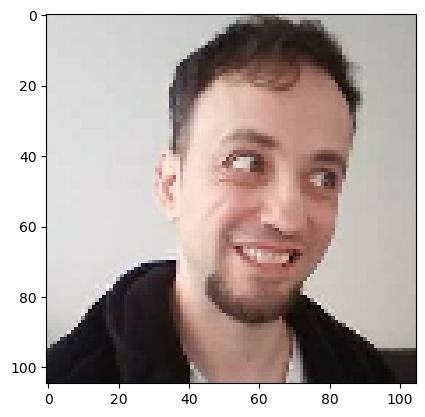

In [14]:
plt.imshow(img)

# Create labelled dataset

In [15]:
positives = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negatives = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positives.concatenate(negatives)

##### in the line below it demonstrates how the tensorflow functions " ones " and " zeros " works, basically we are getting all the images , if these images are expected to return a positive we assign a value of one and if is a negative we assign a value of zero, the result of this approach will give us a large array of 'ones' and 'zeros' that will be passed later on to train the model

In [35]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

##### Types : first String is the file path to a specific image, the second string is either a file path to a positive or a negative image and the last value is going to represent if we are taking a positive or negative verification on our image recognition ( negative = 0 , positive = 1 )

In [36]:
samples = data.as_numpy_iterator()

##### here is another example on what is being done, the first value is the file path to our anchor image, the second value is the file path to a positive image and the 'Label' value is 1

In [37]:
example = samples.next()

In [38]:
example

(b'data\\anchor\\052fe6fc-e441-11ed-ac36-5cf3709dfa24.jpg',
 b'data\\positive\\62d7056d-e440-11ed-8a51-5cf3709dfa24.jpg',
 1.0)

##### this function will load and preprocess two  images and assign the label value

In [16]:
def preprocess_twin(input_img, validation_img, label):
    return(preprocess(input_img), preprocess(validation_img), label)

In [40]:
res = preprocess_twin(*example)

##### here we can verify that the function return an array of 3 objects, The first object is the anchor image, the second is the positive or negative image and the third object is our label

In [41]:
len(res)

3

##### visualization of the image, shape is 105x105 pixels and 3 channels, pixel values between 0 and 1

In [42]:
res[0]

<tf.Tensor: shape=(105, 105, 3), dtype=float32, numpy=
array([[[0.82623714, 0.84976655, 0.8419234 ],
        [0.82623714, 0.84976655, 0.8419234 ],
        [0.82623714, 0.84976655, 0.8419234 ],
        ...,
        [0.6895314 , 0.69345295, 0.6738451 ],
        [0.6851474 , 0.689069  , 0.66946113],
        [0.68898225, 0.6929038 , 0.673296  ]],

       [[0.82408965, 0.84705883, 0.8394958 ],
        [0.82408965, 0.84705883, 0.8394958 ],
        [0.82408965, 0.84705883, 0.8394958 ],
        ...,
        [0.6882019 , 0.6921235 , 0.67251563],
        [0.68289316, 0.6868147 , 0.6672069 ],
        [0.6865546 , 0.6904762 , 0.67086834]],

       [[0.83277315, 0.8449113 , 0.8409897 ],
        [0.83277315, 0.8449113 , 0.8409897 ],
        [0.83277315, 0.8449113 , 0.8409897 ],
        ...,
        [0.6890201 , 0.69294167, 0.6733338 ],
        [0.68263304, 0.6865546 , 0.66694677],
        [0.6901961 , 0.69411767, 0.6745098 ]],

       ...,

       [[0.09644078, 0.09606727, 0.11390109],
        [0.09

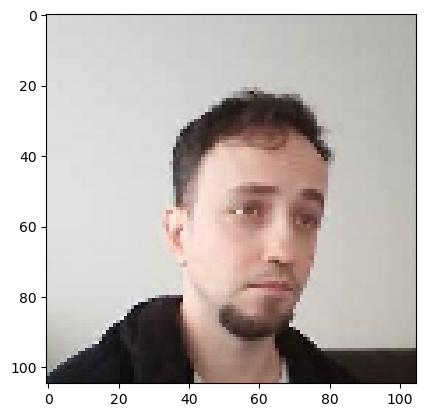

In [43]:
plt.imshow(res[1])

In [44]:
res[2]

1.0

# Build dataloader pipeline

In [17]:
# mapping the dataset
data = data.map(preprocess_twin)
# 'caching' the data
data = data.cache()
# shuffle the samples, the reason I am shuffling the samples is because we need to split the data into test and training
# so when I start training the model we should have a fairly mixed set of samples
data = data.shuffle(buffer_size=1024)

In [18]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(105, 105, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

### Checking if the data is accurate, if the first image and the second image are the same person the label value should be 1, if they are not the same person the label value should be 0

In [19]:
samples = data.as_numpy_iterator()

In [32]:
samp = samples.next()

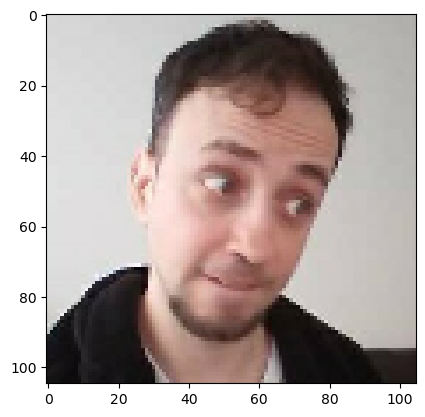

In [33]:
plt.imshow(samp[0])

In [34]:
samp[2]

1.0

# training partition

In [51]:
# takes 70% of the dataset for the training
train_data = data.take(round(len(data)*.7))
#this will send batches of 16 images to train the model
train_data = train_data.batch(16)
# starts preprocessing the next set of images
train_data = train_data.prefetch(8)

# test partition

In [52]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

# Model Engineering

### Build embedding layer

In [55]:
def make_embedding():
    inp = Input(shape=(105,105,3), name='input_image')
    
    #first block
    c1 = Conv2D(64,(10,10), activation='relu')(inp)
    m1 = MaxPooling2D(64,(2,2), padding='same')(c1)
    
    #second block
    c2 = Conv2D(128,(7,7), activation='relu')(m1)
    m2 = MaxPooling2D(64,(2,2), padding='same')(c2)
    
    #third block
    c3 = Conv2D(128,(4,4), activation='relu')(m2)
    m3 = MaxPooling2D(64,(2,2), padding='same')(c3)
    
    #fourth block
    c4 = Conv2D(256,(4,4), activation='relu')(m3)
    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)
    
    
    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [56]:
embedding = make_embedding()

In [57]:
embedding.summary()

Model: "embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_image (InputLayer)    [(None, 105, 105, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 96, 96, 64)        19264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 128)       401536    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 21, 21, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 18, 18, 128)       26

# Distance Layer

In [36]:
class L1Dist(Layer):
    # Init method - inheritance
    def __init__(self, **kwargs):
        super().__init__()
        
    # Tells the layer what to do when data is passed to it -> similarity calculation  
    def call(self, input_embedding, validation_embedding):
        return tf.math.abs(input_embedding - validation_embedding)

In [37]:
l1 = L1Dist()

In [60]:
def make_siamese_model(): 
    
    # Anchor image input in the network
    input_image = Input(name='input_img', shape=(105,105,3))
    
    # Validation image in the network 
    validation_image = Input(name='validation_img', shape=(105,105,3))
    
    # Combine siamese distance components
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'
    distances = siamese_layer(embedding(input_image), embedding(validation_image))
    
    # Classification layer 
    classifier = Dense(1, activation='sigmoid')(distances)
    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [61]:
siamese_model = make_siamese_model()

In [62]:

siamese_model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# Training

In [63]:
#set the loss function
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [64]:
#optmizer
opt = tf.keras.optimizers.Adam(1e-4)

##### Stabilish checkpoints

In [65]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint( opt=opt, siamese_model=siamese_model)

###### Training step function

In [66]:
@tf.function
def train_step(batch):
    
    # Record all of our operations 
    with tf.GradientTape() as tape:     
        # Get anchor and positive/negative image
        X = batch[:2]
        # Get label
        y = batch[2]
        
        # Forward pass
        yhat = siamese_model(X, training=True)
        # Calculate loss
        loss = binary_cross_loss(y, yhat)
    print(loss)
        
    # Calculate gradients
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    # Calculate updated weights and apply to siamese model
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
        
    # Return loss
    return loss

#### Training loop

In [67]:
# Import metric calculations
from tensorflow.keras.metrics import Precision, Recall

In [68]:
def train(data, EPOCHS):
    # Loop through epochs
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        # Creating a metric object 
        r = Recall()
        p = Precision()
        
        # Loop through each batch
        for idx, batch in enumerate(data):
            # Run train step here
            loss = train_step(batch)
            yhat = siamese_model.predict(batch[:2])
            r.update_state(batch[2], yhat)
            p.update_state(batch[2], yhat) 
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy())
        
        # Save checkpoints
        if epoch % 10 == 0: 
            checkpoint.save(file_prefix=checkpoint_prefix)

## Train the model

In [69]:
EPOCHS = 50

In [49]:
train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/weighted_loss/value:0", shape=(), dtype=float32)
27/27 [==============================] - 482s 18s/step
0.17428386 0.74178404 0.9937107

 Epoch 2/50
27/27 [==============================] - 475s 18s/step
0.10256004 1.0 1.0

 Epoch 3/50
27/27 [==============================] - 477s 18s/step
0.0011948858 0.9950739 1.0

 Epoch 4/50
27/27 [==============================] - 479s 18s/step
0.06330281 1.0 1.0

 Epoch 5/50
27/27 [==============================] - 476s 18s/step
7.757082e-05 1.0 1.0

 Epoch 6/50
27/27 [==============================] - 463s 17s/step
0.00020296426 1.0 1.0

 Epoch 7/50
27/27 [==============================] - 454s 17s/step
1.2025526e-05 1.0 1.0

 Epoch 8/50
27/27 [==============================] - 453s 17s/step
4.410782e-06 1.0 1.0

 Epoch 9/50
27/27 [==============================] - 454s 17s/step
5.414162e-05 1.0 1.0

 Epoch 10/50
27/27 [=========

27/27 [==============================] - 453s 17s/step
5.621294e-05 1.0 1.0

 Epoch 13/50
27/27 [==============================] - 453s 17s/step
8.9406974e-08 1.0 1.0

 Epoch 14/50
27/27 [==============================] - 453s 17s/step
9.417652e-06 1.0 1.0

 Epoch 15/50
27/27 [==============================] - 454s 17s/step
2.2500853e-06 1.0 1.0

 Epoch 16/50
27/27 [==============================] - 454s 17s/step
1.2218977e-06 1.0 1.0

 Epoch 17/50
27/27 [==============================] - 454s 17s/step
0.0 1.0 1.0

 Epoch 18/50
27/27 [==============================] - 454s 17s/step
3.5762812e-07 1.0 1.0

 Epoch 19/50
27/27 [==============================] - 454s 17s/step
3.1441646e-06 1.0 1.0

 Epoch 20/50
27/27 [==============================] - 454s 17s/step
6.9589055e-06 1.0 1.0

 Epoch 21/50
27/27 [==============================] - 454s 17s/step
3.1888687e-06 1.0 1.0

 Epoch 22/50
27/27 [==============================] - 457s 17s/step
2.4885062e-06 1.0 1.0

 Epoch 23/50
1/1 [======

27/27 [==============================] - 454s 17s/step
3.7551208e-06 1.0 1.0

 Epoch 24/50
27/27 [==============================] - 453s 17s/step
0.0 1.0 1.0

 Epoch 25/50
27/27 [==============================] - 454s 17s/step
2.9802326e-08 1.0 1.0

 Epoch 26/50
27/27 [==============================] - 455s 17s/step
1.3560078e-06 1.0 1.0

 Epoch 27/50
27/27 [==============================] - 453s 17s/step
5.2949224e-05 1.0 1.0

 Epoch 28/50
27/27 [==============================] - 456s 17s/step
0.0 1.0 1.0

 Epoch 29/50
27/27 [==============================] - 453s 17s/step
6.1094806e-07 1.0 1.0

 Epoch 30/50
27/27 [==============================] - 453s 17s/step
0.0 1.0 1.0

 Epoch 31/50
27/27 [==============================] - 454s 17s/step
8.8812485e-06 1.0 1.0

 Epoch 32/50
27/27 [==============================] - 454s 17s/step
3.2782577e-07 1.0 1.0

 Epoch 33/50
27/27 [==============================] - 456s 17s/step
0.0 1.0 1.0

 Epoch 34/50
1/1 [==============================] - 

27/27 [==============================] - 453s 17s/step
0.0 1.0 1.0

 Epoch 35/50
27/27 [==============================] - 453s 17s/step
7.5996024e-07 1.0 1.0

 Epoch 36/50
27/27 [==============================] - 454s 17s/step
0.0002030799 1.0 1.0

 Epoch 37/50
27/27 [==============================] - 453s 17s/step
1.9371514e-07 1.0 1.0

 Epoch 38/50
27/27 [==============================] - 453s 17s/step
0.0 1.0 1.0

 Epoch 39/50
27/27 [==============================] - 453s 17s/step
8.9407047e-07 1.0 1.0

 Epoch 40/50
27/27 [==============================] - 453s 17s/step
0.0 1.0 1.0

 Epoch 41/50
27/27 [==============================] - 453s 17s/step
2.4096338e-05 1.0 1.0

 Epoch 42/50
27/27 [==============================] - 454s 17s/step
0.0 1.0 1.0

 Epoch 43/50
27/27 [==============================] - 454s 17s/step
7.59172e-05 1.0 1.0

 Epoch 44/50
27/27 [==============================] - 455s 17s/step
0.0 1.0 1.0

 Epoch 45/50
27/27 [==============================] - 455s 17s/st

27/27 [==============================] - 453s 17s/step
0.0 1.0 1.0

 Epoch 47/50
27/27 [==============================] - 454s 17s/step
0.0 1.0 1.0

 Epoch 48/50
27/27 [==============================] - 453s 17s/step
8.940699e-08 1.0 1.0

 Epoch 49/50
27/27 [==============================] - 453s 17s/step
1.40074835e-05 1.0 1.0

 Epoch 50/50
27/27 [==============================] - 454s 17s/step
1.0430815e-07 1.0 1.0


# Evaluate the model

##### get a batch of test data

In [86]:
test_input, test_val, y_true = test_data.as_numpy_iterator().next()

In [85]:
test_data = data.skip(round(len(data)*.7))
test_data = test_data.take(round(len(data)*.3))
test_data = test_data.batch(300)
test_data = test_data.prefetch(8)

each batch is composed of 16 Anchor images, 16 positive/negative images, and an array of Labels which are 1 for positive and 0 for negative

##### predictions

In [87]:
y_hat = model.predict([test_input,test_val])
y_hat

6/6 [==============================] - 18s 3s/step


array([[5.43249334e-11],
       [4.15703703e-08],
       [4.96380714e-11],
       [1.00000000e+00],
       [8.21130541e-09],
       [7.73009745e-09],
       [5.87995985e-10],
       [7.93329935e-09],
       [9.99998450e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99850929e-01],
       [1.00000000e+00],
       [9.99999940e-01],
       [9.99999762e-01],
       [1.19681374e-11],
       [1.00000000e+00],
       [9.99999940e-01],
       [7.42263695e-10],
       [1.16528107e-10],
       [1.31447175e-09],
       [2.93502382e-07],
       [7.78868298e-07],
       [2.68251443e-09],
       [1.00000000e+00],
       [9.99999881e-01],
       [1.26173386e-11],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99999821e-01],
       [1.00000000e+00],
       [1.95110750e-09],
       [1.25760991e-09],
       [3.65761488e-09],
       [5.48969581e-07],
       [9.72892877e-09],
       [9.99999940e-01],
       [4.28663549e-10],


### Post processing the results

here I am just converting the results to a binary output, where 1 is Positive and 0 Negative

In [88]:
[1 if prediction > 0.5 else 0 for prediction in y_hat]

[0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0]

In [89]:
#Creating a metric object
m = Recall()
# Calculating the recall value
m.update_state(y_true, y_hat)

# Return result
m.result().numpy()

1.0

In [90]:
#Creating a metric object
m = Precision()
# Calculating the recall value
m.update_state(y_true, y_hat)

# Return result
m.result().numpy()

0.9885057

### Vizualize Results

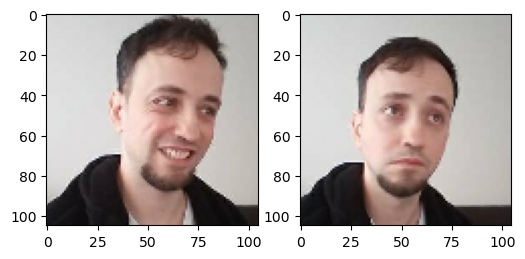

In [93]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.imshow(test_input[3])
plt.subplot(1,2,2)
plt.imshow(test_val[3])
plt.show()

# Save the model

In [86]:
siamese_model.save('siamesemodel.h5')

##### debbuging section to fix the Warning

In [141]:
model_save_test = siamese_model

##### compiling the model before saving solves the problem

In [142]:
model_save_test.compile(optimizer=opt, loss=binary_cross_loss, metrics=[Precision(),Recall()])

In [143]:
model_save_test.save('model_save_test.h5')

##### Loading the saved model

In [38]:
model = tf.keras.models.load_model('model_save_test.h5', custom_objects={'L1Dist':L1Dist, 'BinaryCrossentropy':tf.losses.BinaryCrossentropy})

##### Testing the loaded model

In [ ]:
y_hat = model.predict([test_input, test_val])

In [26]:
y_hat

array([[7.4245124e-12],
       [1.7987202e-09],
       [9.9999988e-01],
       [1.4381132e-09],
       [9.2268495e-09],
       [2.1154503e-11],
       [3.8029896e-10],
       [1.0000000e+00],
       [9.9999791e-01],
       [9.9999619e-01],
       [1.0000000e+00],
       [3.4092720e-09],
       [9.9999613e-01],
       [1.3248116e-09],
       [9.9999928e-01],
       [9.9999958e-01]], dtype=float32)

In [27]:
model.summary()

Model: "SiameseNetwork"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 validation_img (InputLayer)    [(None, 105, 105, 3  0           []                               
                                )]                                                                
                                                                                                  
 embedding (Functional)         (None, 4096)         38960448    ['input_img[0][0]',              
                                                                  'validation_img[0][

# Real time test

### Verification function
##### Detection threshold : Metric above which a prediction is considered positive
##### Verification threshold : Proportion of positive predictions / total positive samples


In [40]:
def verify( model, detection_threshold, verification_threshold):
    #Build results array
    results = []
    for image in os.listdir(os.path.join('application_data', 'verification_images')):
        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
        #Make Predictions
        result = model.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
        
    #Detection Threshold
    detection = np.sum(np.array(results) > detection_threshold)    
    
    #Verification threshold
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
    verified = verification > verification_threshold
    
    return results, verified    

# OpenCV real time verification

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    #Cut down frame to 250x250px
    frame = frame[25:25+250, 200:200+250, :]
    
    cv2.imshow('Verification', frame)
    
    #Verification trigger
    if cv2.waitKey(10) & 0xFF == ord('v'):
        #Save input image to application_data/input_image folder
        cv2.imwrite(os.path.join('application_data','input_image','input_image.jpg'), frame)
        #Verification function
        results, verified = verify(model, 0.8,0.6)
        print(verified)
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()